<a href="https://colab.research.google.com/github/FaraazArsath/GUVI---Assignment_8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [135]:
df = pd.read_csv("car_data.csv")
df.shape

(804, 12)

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


Detecting outliers

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Cruise      199
Cylinder      0
Doors       190
Leather       0
Liter         0
Make          0
Mileage       5
Model         0
Price        17
Sound         0
Trim          0
Type          0
dtype: int64

EDA - Mileage VS. Price

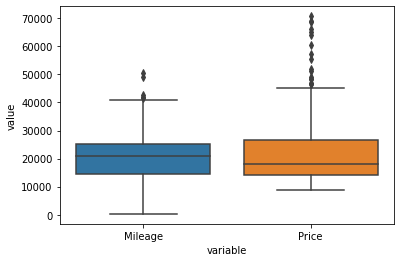

In [ ]:
df = pd.DataFrame(data = df, columns = ['Mileage','Price'])
sns.boxplot(x="variable", y="value",data=pd.melt(df))
plt.show()

since the outliers in 'Price' and 'Mileage' represent natural variations in the population, and they should be left as is in our dataset and these are called true outliers. 

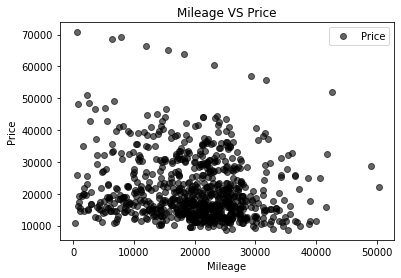

In [21]:
df.plot(x='Mileage',y='Price',style='o',color='black',alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage VS Price")
plt.show()

In [ ]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


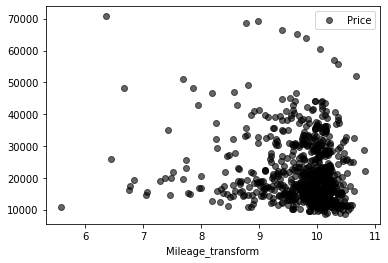

In [22]:
df['Mileage_transform'] = np.log(df['Mileage'])
df.plot(x='Mileage_transform',y='Price',style='o',color='black',alpha=0.6)
plt.show()

In [ ]:
df[['Mileage_transform','Price']].corr()

,Mileage_transform,Price
Mileage_transform,1.000000,-0.145424
Price,-0.145424,1.000000


After doing all transformation we can find there is no linear relationship between 'Mileage' and 'Price' in the given dataset.

# **Tasks, Part 1**


**1. Find the linear regression equation for mileage vs price.**

In [31]:
X = df[['Mileage']].values
y = df['Price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

In [32]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
print("Linear Regression equation : y = {:.3f} x + {:.3f}".format(regressor.coef_[0],regressor.intercept_))

Linear Regression equation : y = -0.120 x + 23701.613


Price = 23701 - 0.12 Mileage

**2. Chart the original data and the equation on the chart.**

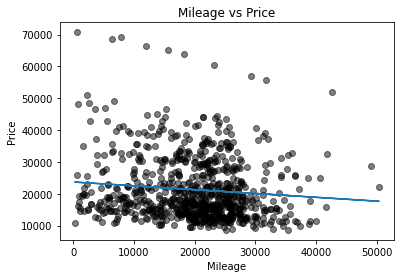

In [34]:
plt.scatter(X,y,color='black',alpha=0.5)
plt.plot(X, regressor.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

**3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [12]:
y_predict = regressor.predict(X_test)
print("r^2 Score :", metrics.r2_score(y_test,y_predict))

r^2 Score : 0.039431449593484214


The low correlation and R2 score value between 'Mileage' and 'Price' indicates that this feature can be droped while predicting 'Price'

# **Tasks, Part 2**

**1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [35]:
X = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [36]:
regressor =LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [37]:
print("Linear Regression equation : y = {:.3f} x1 + {:.3f} x2+ {:.3f} x3 + {:.3f} x4 + {:.3f} x5 + {:.3f} x6 + {:.3f} x7 + {:.3f}".format(regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4],regressor.coef_[5],regressor.coef_[6],regressor.intercept_))

Linear Regression equation : y = -1083.519 x1 + 5844.050 x2+ -1171.721 x3 + -1381.197 x4 + 2553.492 x5 + -895.066 x6 + 1252.059 x7 + 21304.203


Price = 21304.20 -1083.51 Mileage + 5844.05 Cylinder -1171.72 Liter - 1381.19 Doors + 2553.49 Cruise -895.06 Sound + 1252.05 Leather

**2. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [38]:
y_predict = regressor.predict(X_test_scaled)
print("r^2 Score :", metrics.r2_score(y_test,y_predict))

r^2 Score : 0.43622500315938784


**3. Find the combination of the factors that is the best predictor for price.**

In [39]:
coeff_df = pd.DataFrame(regressor.coef_,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],columns = ['Coefficient'])
coeff_df

,Coefficient
Mileage,-1083.519495
Cylinder,5844.050425
Liter,-1171.720864
Doors,-1381.197243
Cruise,2553.492358
Sound,-895.065761
Leather,1252.058723


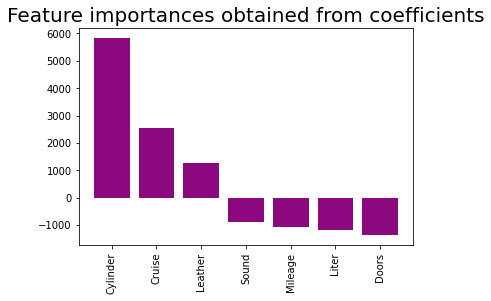

In [40]:
data={
    'Attribute': ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],
    'Importance': [-1083.51949546,  5844.05042523, -1171.72086432, -1381.19724291,
        2553.49235807,  -895.06576058,  1252.05872321]
}
importances = pd.DataFrame(data)
importances = importances.sort_values(by='Importance', ascending=False)
# Visualization
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#8b087e')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Feature importantance : Feature with highest absolute value of the coefficient is the most important feature.

In this, Cylinder has the highest absolute value of the coefficient so it is the important feature

In [44]:
def combinations(F):
  if F:
    result = combinations(F[:-1])
    return result + [i+[F[-1]] for i in result]
  else:
    return [[]]
comb = combinations (['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [78]:
R2_Score = []
for i in comb:
    X = df[i].values
    y = df.loc[:,'Price'].values
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)

    regressor = LinearRegression()
    regressor.fit(X_train_scaled,y_train)
    y_predict = regressor.predict(X_test_scaled)
   
    R2_Score.append(metrics.r2_score(y_test,y_predict))

In [79]:
df_snew = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
df_snew

,Feature Combination,R2 Score
0,[Mileage],-0.013001
1,[Cylinder],0.323626
2,"[Mileage, Cylinder]",0.317725
3,[Liter],0.329412
4,"[Mileage, Liter]",0.330573
...,...,...
122,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.347955
123,"[Liter, Doors, Cruise, Sound, Leather]",0.333669
124,"[Mileage, Liter, Doors, Cruise, Sound, Leather]",0.346957
125,"[Cylinder, Liter, Doors, Cruise, Sound, Leather]",0.333524


In [80]:
df_snew['R2 Score'].max()

0.38431998322266625

In [81]:
df_snew['R2 Score'].argmax()

52

In [82]:
df_snew['Feature Combination'][df_snew['R2 Score'].argmax()]

['Mileage', 'Liter', 'Cruise', 'Sound']

From the combinations, the best R2 Score we found is for [Mileage,Liter,Cruise,Sound] which is 0.38431998322266625 and there are other combinations where we found R2 Score value nearer to 0.38. Thus lets try with EDA of coffecient values of different combinations

EDA analysis - various features with 'Price'

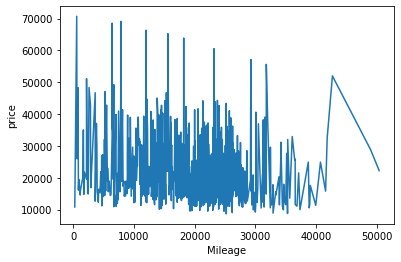

          Mileage     Price
Mileage  1.000000 -0.143051
Price   -0.143051  1.000000


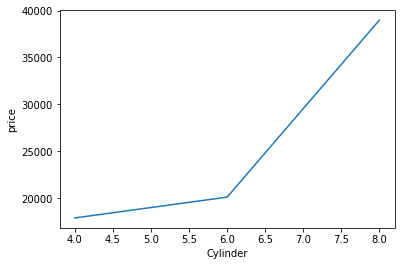

          Cylinder     Price
Cylinder  1.000000  0.569086
Price     0.569086  1.000000


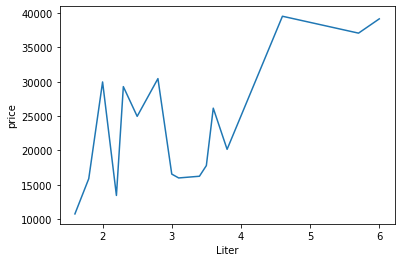

          Liter     Price
Liter  1.000000  0.558146
Price  0.558146  1.000000


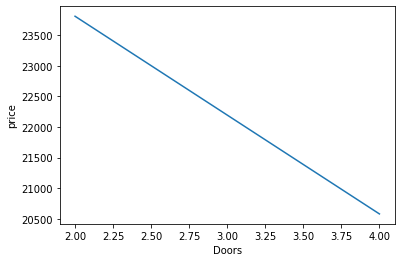

         Doors    Price
Doors  1.00000 -0.13875
Price -0.13875  1.00000


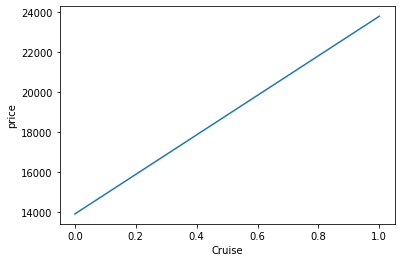

          Cruise     Price
Cruise  1.000000  0.430851
Price   0.430851  1.000000


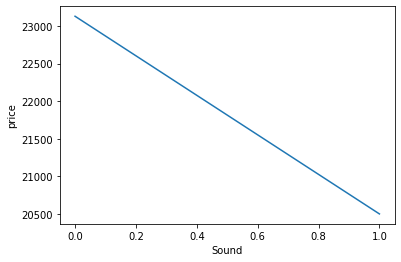

          Sound     Price
Sound  1.000000 -0.124348
Price -0.124348  1.000000


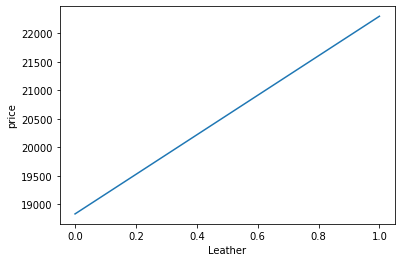

          Leather     Price
Leather  1.000000  0.157197
Price    0.157197  1.000000


In [48]:
def plotting_with_one_feature():
    for i in ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'):
      df.groupby(df[i])['Price'].mean().plot()
      #plt.title(i,' vs Price')
      plt.xlabel(i)
      plt.ylabel('price')
      plt.show()
      print(df[[i,'Price']].corr())

plotting_with_one_feature()

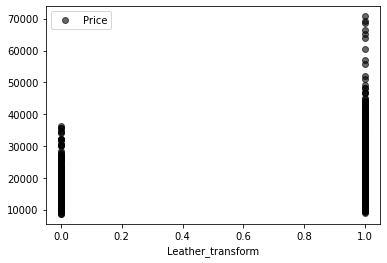

In [88]:
df['Leather_transform'] = np.power(df['Leather'],2)
df.plot(x='Leather_transform',y='Price',style='o',color='black',alpha=0.6)
plt.show()

In [89]:
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


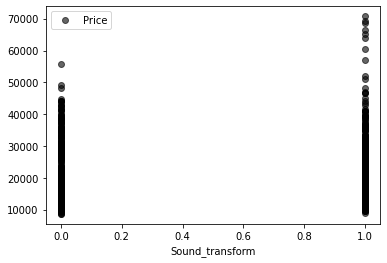

In [90]:
df['Sound_transform'] = np.power(df['Sound'],2)
df.plot(x='Sound_transform',y='Price',style='o',color='black',alpha=0.6)
plt.show()

In [91]:
df[['Leather_transform','Price']].corr()

,Leather_transform,Price
Leather_transform,1.000000,0.157197
Price,0.157197,1.000000


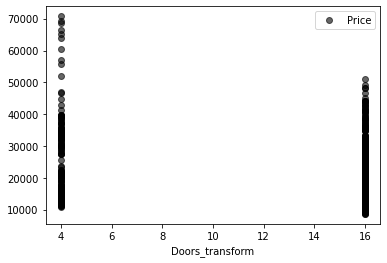

In [92]:
df['Doors_transform'] = np.power(df['Doors'],2)
df.plot(x='Doors_transform',y='Price',style='o',color='black',alpha=0.6)
plt.show()

In [93]:
df[['Doors_transform','Price']].corr()

,Doors_transform,Price
Doors_transform,1.00000,-0.13875
Price,-0.13875,1.00000


Thus after doing all tranformations to 'Mileage','Doors','Sound' and 'Leather' features we found there is no linear relationshp existing. Therefore, we can take features 'Cylinder','Liter','Cruise' which is having linear relationship with 'Price'

In [94]:
X = df[['Cylinder','Liter','Cruise']].values
y = df['Price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

In [95]:
regressor =LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [96]:
y_predict = regressor.predict(X_test)
print("r^2 Score :", metrics.r2_score(y_test,y_predict))

r^2 Score : 0.37625592173388434


In [52]:
df_Prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_Prediction

,Actual,Predicted
0,13072.841631,12434.867329
1,12383.402811,18859.296443
2,26698.078151,18828.614073
3,18566.070703,25798.219241
4,19641.741902,25798.219241
...,...,...
237,42773.028390,32553.047816
238,13174.071009,12434.867329
239,15395.010874,18859.296443
240,29612.154048,18920.661184


Cylinder ,Liter and Cruise are the combination of the factors that is the best predictor for price from the above dataset.

# **Tasks, Hard Mode**

**1. Research dummy variables in scikit-learn to see how to use the make, model, and body type**

In [136]:
data = pd.read_csv("car_data.csv",usecols=['Price','Make','Model','Trim','Type'])
data.head()

,Price,Make,Model,Trim,Type
0,17314.103129,Buick,Century,Sedan 4D,Sedan
1,17542.036083,Buick,Century,Sedan 4D,Sedan
2,16218.847862,Buick,Century,Sedan 4D,Sedan
3,16336.913140,Buick,Century,Sedan 4D,Sedan
4,16339.170324,Buick,Century,Sedan 4D,Sedan


In [105]:
dummies = pd.get_dummies(data[['Make','Model','Trim','Type']])
dummies

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [106]:
merged = pd.concat([data,dummies],axis='columns')
merged

,Price,Make,Model,Trim,Type,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
final = merged.drop(['Make','Model','Trim','Type'],axis='columns')
final

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
X = final.drop('Price',axis='columns')
X

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
y = final['Price']
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [111]:
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [112]:
y_predict = regressor.predict(X_test_scaled)
print("r^2 Score :", metrics.r2_score(y_test,y_predict))

r^2 Score : 0.9569602617577017


since $R^2$ Score :  0.9569602617577017 . The features Make, Model and type does fit in predicting the price

**2. Find the best combination of factors to predict price**

In [137]:
dff = pd.read_csv('car_data.csv')
to_encode = ['Make','Model','Type','Trim']

In [138]:
def combinations(Ft):
  if Ft:
    result = combinations(Ft[:-1])
    return result + [i+[Ft[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Trim','Type'])
comb = comb[1:]
print(comb)


[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [139]:
R2_Score = []
for i in comb:
  X = dff[i]
  y = dff['Price'].values
  X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

  if 'Mileage' in X_train:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train_scaled,y_train)
  y_predict = regressor.predict(X_test_scaled)
  R2_Score.append(metrics.r2_score(y_test,y_predict))

In [127]:
dff_snew = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
dff_snew

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
2042,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.991644
2043,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.991644
2044,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.991542
2045,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.991542


In [128]:
dff_snew['R2 Score'].max()

0.9921621787561907

In [129]:
dff_snew['Feature Combination'][dff_snew['R2 Score'].argmax()]

['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']

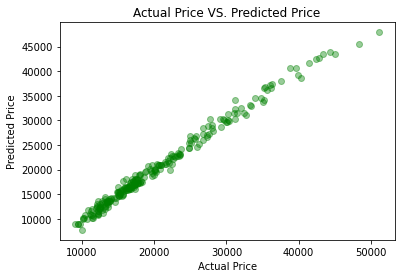

In [157]:
# Vizulaizing Actual & Predicted Price for the  best combination of factors ['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type'] to predict price

X = df[['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']]
y = df['Price'].values
X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)

plt.scatter(y_test,y_predict,color="Green",alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS. Predicted Price")
plt.show()

**'Mileage', 'Cylinder', 'Leather', 'Make', 'Model' ,'Trim', 'Type'** are the best combination of the factors that is the best predictor for price.

There may be theoretical or practical
reasons to believe that higher mileage causes higher prices, but our model   show that there is an association. Since the R2 value of "Mileage Vs. Price" 
indicates that mileage does not explain much of the variability in price prediction.

However,in multi-variable datasets, it is possible to obtain seemingly conflicting results which indicate that mileage is significant predictor of price.